# 02 - ƒ∞statistiksel Analiz ve Hipotez Testleri

## Sprint 2: ƒ∞statistiksel Analiz

Bu notebook, maa≈ü anketi verisinin kapsamlƒ± istatistiksel analizini i√ßerir.

### Hedefler:
- Temel istatistikler ve daƒüƒ±lƒ±m analizi
- Hipotez testleri (t-test, ANOVA, chi-square)
- Korelasyon analizi
- Etki b√ºy√ºkl√ºƒü√º hesaplamalarƒ±
- G√ºven aralƒ±klarƒ±

In [1]:
# Gerekli k√ºt√ºphaneleri import et
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, f_oneway, chi2_contingency, pearsonr, spearmanr
import sys
sys.path.append('../src')
from statistical_analysis import load_cleaned_data, statistical_report

# G√∂rselle≈ütirme ayarlarƒ±
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("K√ºt√ºphaneler ba≈üarƒ±yla y√ºklendi!")

K√ºt√ºphaneler ba≈üarƒ±yla y√ºklendi!


## 1. Veri Y√ºkleme ve ƒ∞statistiksel Analiz

In [2]:
# Temizlenmi≈ü veriyi y√ºkle
df = load_cleaned_data('../data/cleaned_data.csv')

# ƒ∞statistiksel analizi √ßalƒ±≈ütƒ±r
results = statistical_report(df, '../outputs/tables/')

print(f"\nAnaliz tamamlandƒ±! Sonu√ßlar kaydedildi.")

Temizlenmi≈ü veri y√ºklendi. Boyut: (2820, 54)
=== ƒ∞STATƒ∞STƒ∞KSEL ANALƒ∞Z RAPORU ===
=== TEMEL ƒ∞STATƒ∞STƒ∞KLER ===
Maa≈ü ƒ∞statistikleri:
  Ortalama: 91.22 bin TL
  Medyan: 85.50 bin TL
  Standart Sapma: 46.98 bin TL
  Minimum: 5.00 bin TL
  Maksimum: 225.50 bin TL
  √áarpƒ±klƒ±k: 0.722
  Basƒ±klƒ±k: 0.011

Demografik ƒ∞statistikler:
  Toplam katƒ±lƒ±mcƒ±: 2820
  Erkek oranƒ±: 90.9%
  Kadƒ±n oranƒ±: 9.1%

Deneyim Seviyesi Daƒüƒ±lƒ±mƒ±:
  Seviye 5: 1130 (40.1%)
  Seviye 7: 733 (26.0%)
  Seviye 4: 726 (25.7%)
  Seviye 9: 146 (5.2%)
  Seviye 0: 32 (1.1%)
  Seviye 3: 19 (0.7%)
  Seviye 2: 12 (0.4%)
  Seviye 1: 12 (0.4%)
  Seviye 8: 8 (0.3%)
  Seviye 6: 2 (0.1%)

=== Hƒ∞POTEZ TESTLERƒ∞ ===
1. React vs Non-React Maa≈ü Farkƒ± (t-test)
  React kullananlar ortalama: 88.60 bin TL
  React kullanmayanlar ortalama: 92.56 bin TL
  Fark: -3.96 bin TL
  t-istatistiƒüi: -2.121
  p-deƒüeri: 0.034000
  Anlamlƒ± fark: Evet

2. √áalƒ±≈üma ≈ûekli Maa≈ü Farkƒ± (ANOVA)
  Remote ortalama: 98.58 bin TL
  Hyb

## 2. Maa≈ü Daƒüƒ±lƒ±mƒ± Analizi

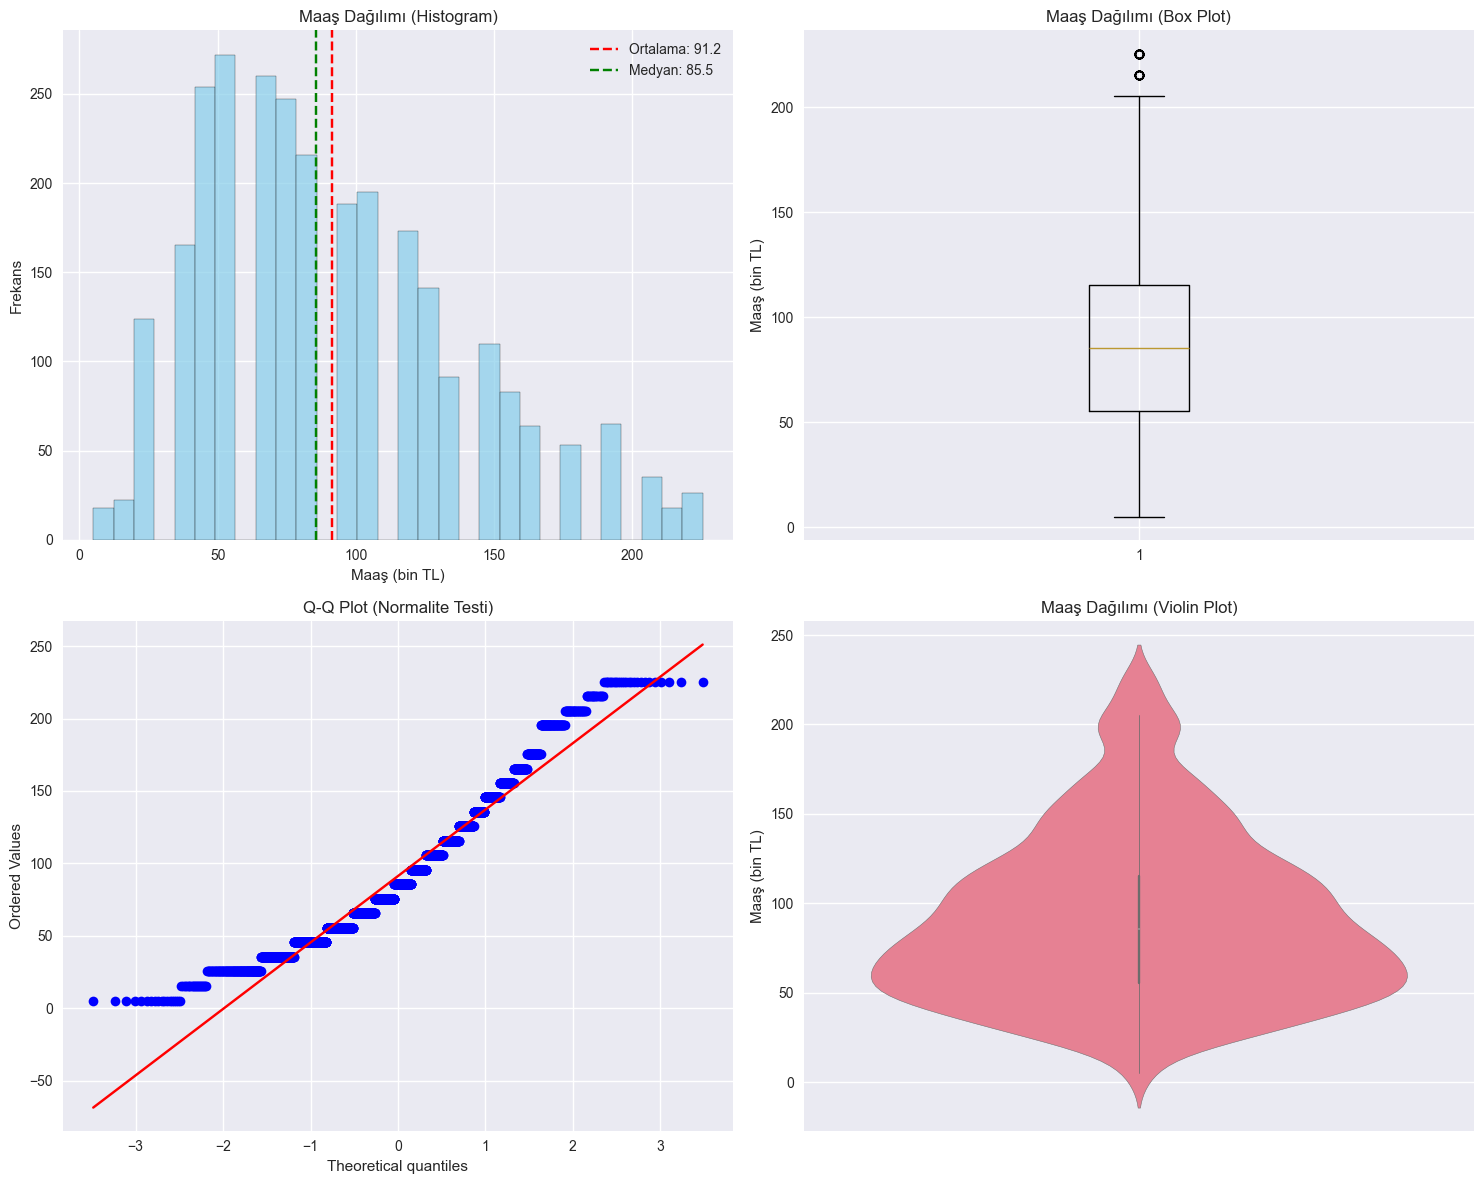

Shapiro-Wilk Normalite Testi:
  ƒ∞statistik: 0.9511
  p-deƒüeri: 0.000000
  Normal daƒüƒ±lƒ±m: Hayƒ±r


In [3]:
# Maa≈ü daƒüƒ±lƒ±mƒ± g√∂rselle≈ütirmesi
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Histogram
axes[0, 0].hist(df['salary_normalized'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Maa≈ü Daƒüƒ±lƒ±mƒ± (Histogram)')
axes[0, 0].set_xlabel('Maa≈ü (bin TL)')
axes[0, 0].set_ylabel('Frekans')
axes[0, 0].axvline(df['salary_normalized'].mean(), color='red', linestyle='--', label=f'Ortalama: {df["salary_normalized"].mean():.1f}')
axes[0, 0].axvline(df['salary_normalized'].median(), color='green', linestyle='--', label=f'Medyan: {df["salary_normalized"].median():.1f}')
axes[0, 0].legend()

# 2. Box Plot
axes[0, 1].boxplot(df['salary_normalized'])
axes[0, 1].set_title('Maa≈ü Daƒüƒ±lƒ±mƒ± (Box Plot)')
axes[0, 1].set_ylabel('Maa≈ü (bin TL)')

# 3. Q-Q Plot (Normalite testi)
stats.probplot(df['salary_normalized'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normalite Testi)')

# 4. Violin Plot
sns.violinplot(y=df['salary_normalized'], ax=axes[1, 1])
axes[1, 1].set_title('Maa≈ü Daƒüƒ±lƒ±mƒ± (Violin Plot)')
axes[1, 1].set_ylabel('Maa≈ü (bin TL)')

plt.tight_layout()
plt.show()

# Normalite testi
shapiro_stat, shapiro_p = stats.shapiro(df['salary_normalized'])
print(f"Shapiro-Wilk Normalite Testi:")
print(f"  ƒ∞statistik: {shapiro_stat:.4f}")
print(f"  p-deƒüeri: {shapiro_p:.6f}")
print(f"  Normal daƒüƒ±lƒ±m: {'Evet' if shapiro_p > 0.05 else 'Hayƒ±r'}")

## 3. React vs Non-React Maa≈ü Kar≈üƒ±la≈ütƒ±rmasƒ±

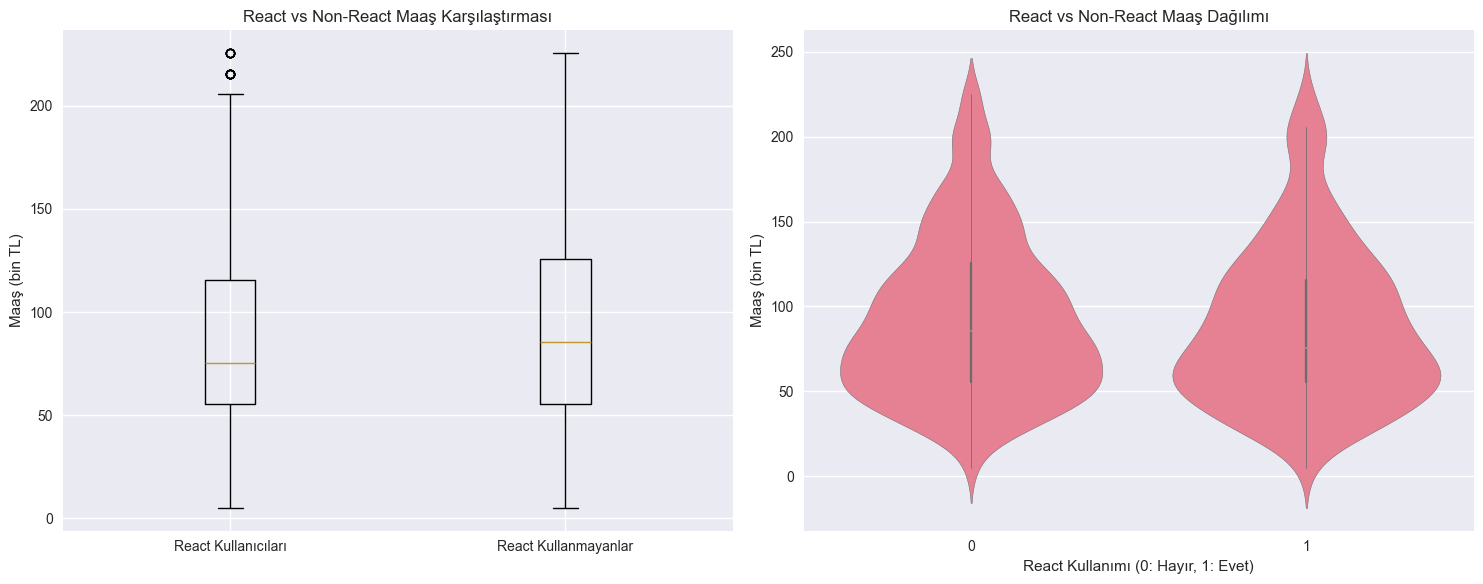

React Kullanƒ±cƒ±larƒ±:
  Sayƒ±: 955
  Ortalama: 88.60 bin TL
  Standart Sapma: 46.96 bin TL

React Kullanmayanlar:
  Sayƒ±: 1865
  Ortalama: 92.56 bin TL
  Standart Sapma: 46.95 bin TL

Fark: -3.96 bin TL
Y√ºzde fark: -4.3%


In [4]:
# React kullanƒ±mƒ±na g√∂re maa≈ü kar≈üƒ±la≈ütƒ±rmasƒ±
react_salary = df[df['Frontend_React'] == 1]['salary_normalized']
non_react_salary = df[df['Frontend_React'] == 0]['salary_normalized']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Box Plot kar≈üƒ±la≈ütƒ±rmasƒ±
data_to_plot = [react_salary, non_react_salary]
axes[0].boxplot(data_to_plot, labels=['React Kullanƒ±cƒ±larƒ±', 'React Kullanmayanlar'])
axes[0].set_title('React vs Non-React Maa≈ü Kar≈üƒ±la≈ütƒ±rmasƒ±')
axes[0].set_ylabel('Maa≈ü (bin TL)')

# 2. Violin Plot kar≈üƒ±la≈ütƒ±rmasƒ±
sns.violinplot(data=df, x='Frontend_React', y='salary_normalized', ax=axes[1])
axes[1].set_title('React vs Non-React Maa≈ü Daƒüƒ±lƒ±mƒ±')
axes[1].set_xlabel('React Kullanƒ±mƒ± (0: Hayƒ±r, 1: Evet)')
axes[1].set_ylabel('Maa≈ü (bin TL)')

plt.tight_layout()
plt.show()

# ƒ∞statistiksel √∂zet
print(f"React Kullanƒ±cƒ±larƒ±:")
print(f"  Sayƒ±: {len(react_salary)}")
print(f"  Ortalama: {react_salary.mean():.2f} bin TL")
print(f"  Standart Sapma: {react_salary.std():.2f} bin TL")

print(f"\nReact Kullanmayanlar:")
print(f"  Sayƒ±: {len(non_react_salary)}")
print(f"  Ortalama: {non_react_salary.mean():.2f} bin TL")
print(f"  Standart Sapma: {non_react_salary.std():.2f} bin TL")

print(f"\nFark: {react_salary.mean() - non_react_salary.mean():.2f} bin TL")
print(f"Y√ºzde fark: {((react_salary.mean() - non_react_salary.mean()) / non_react_salary.mean() * 100):.1f}%")

## 4. √áalƒ±≈üma ≈ûekli Maa≈ü Analizi

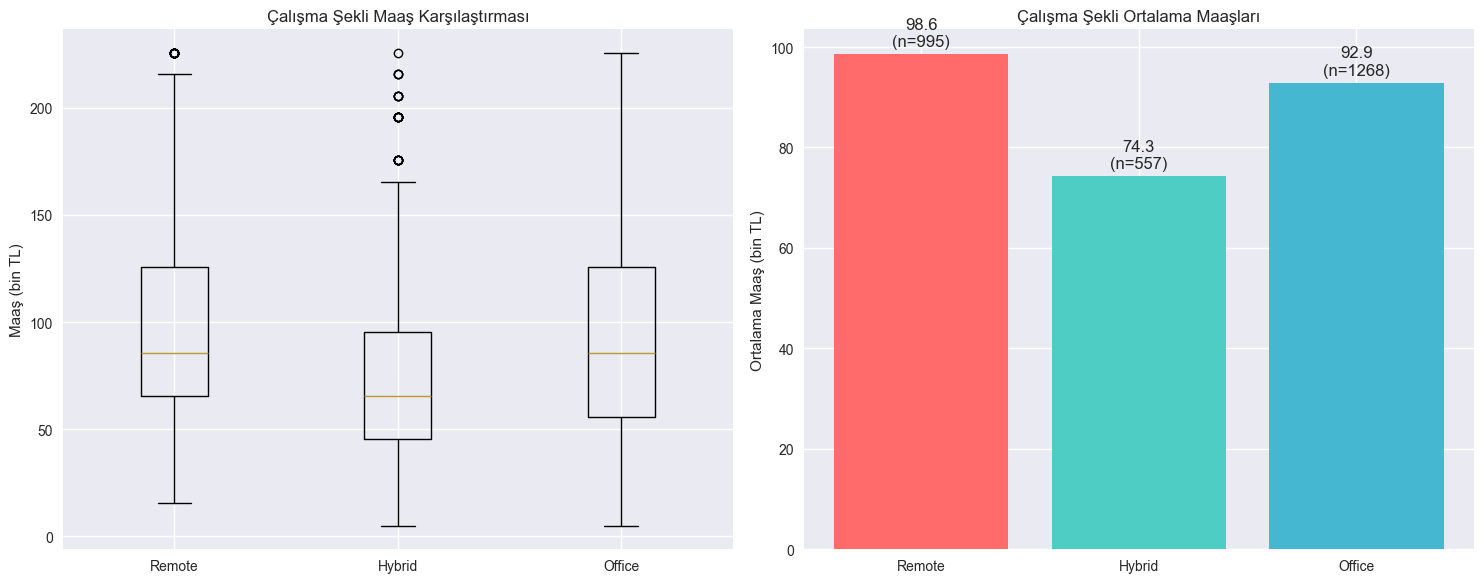

Remote:
  Sayƒ±: 995
  Ortalama: 98.58 bin TL
  Standart Sapma: 47.23 bin TL

Hybrid:
  Sayƒ±: 557
  Ortalama: 74.27 bin TL
  Standart Sapma: 43.36 bin TL

Office:
  Sayƒ±: 1268
  Ortalama: 92.88 bin TL
  Standart Sapma: 46.53 bin TL



In [5]:
# √áalƒ±≈üma ≈üekline g√∂re maa≈ü analizi
work_types = ['Remote', 'Hybrid', 'Office']
work_salaries = [
    df[df['√áalƒ±≈üma ≈üekli'] == 0]['salary_normalized'],  # Remote
    df[df['√áalƒ±≈üma ≈üekli'] == 1]['salary_normalized'],  # Hybrid
    df[df['√áalƒ±≈üma ≈üekli'] == 2]['salary_normalized']   # Office
]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Box Plot
axes[0].boxplot(work_salaries, labels=work_types)
axes[0].set_title('√áalƒ±≈üma ≈ûekli Maa≈ü Kar≈üƒ±la≈ütƒ±rmasƒ±')
axes[0].set_ylabel('Maa≈ü (bin TL)')

# 2. Bar Plot (ortalamalar)
means = [salary.mean() for salary in work_salaries]
counts = [len(salary) for salary in work_salaries]

bars = axes[1].bar(work_types, means, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1].set_title('√áalƒ±≈üma ≈ûekli Ortalama Maa≈ülarƒ±')
axes[1].set_ylabel('Ortalama Maa≈ü (bin TL)')

# Bar √ºzerine deƒüerleri yaz
for bar, mean, count in zip(bars, means, counts):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{mean:.1f}\n(n={count})',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

# ƒ∞statistiksel √∂zet
for i, work_type in enumerate(work_types):
    salary_data = work_salaries[i]
    print(f"{work_type}:")
    print(f"  Sayƒ±: {len(salary_data)}")
    print(f"  Ortalama: {salary_data.mean():.2f} bin TL")
    print(f"  Standart Sapma: {salary_data.std():.2f} bin TL")
    print()

## 5. Cinsiyet Bazlƒ± Maa≈ü Analizi

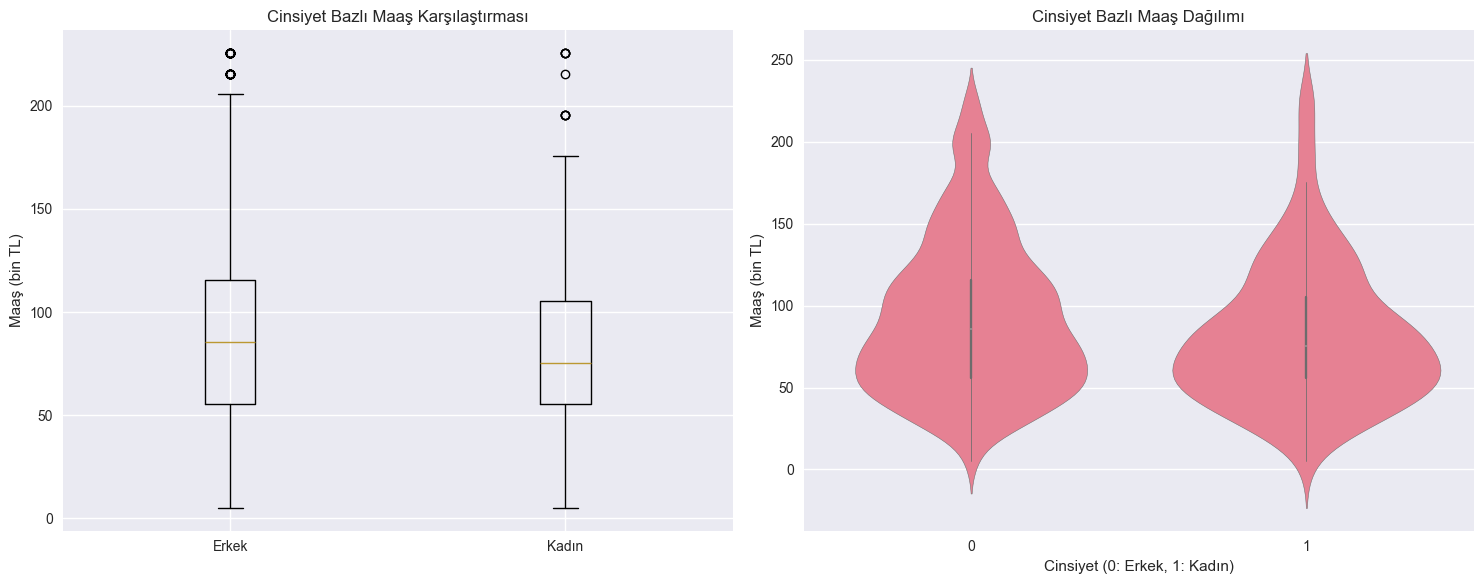

Erkek Katƒ±lƒ±mcƒ±lar:
  Sayƒ±: 2564
  Ortalama: 92.18 bin TL
  Standart Sapma: 47.24 bin TL

Kadƒ±n Katƒ±lƒ±mcƒ±lar:
  Sayƒ±: 256
  Ortalama: 81.59 bin TL
  Standart Sapma: 43.20 bin TL

Gender Gap: 11.5%
Mutlak Fark: 10.59 bin TL


In [6]:
# Cinsiyet bazlƒ± maa≈ü analizi
male_salary = df[df['Cinsiyet'] == 0]['salary_normalized']  # Erkek
female_salary = df[df['Cinsiyet'] == 1]['salary_normalized']  # Kadƒ±n

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Box Plot
data_to_plot = [male_salary, female_salary]
axes[0].boxplot(data_to_plot, labels=['Erkek', 'Kadƒ±n'])
axes[0].set_title('Cinsiyet Bazlƒ± Maa≈ü Kar≈üƒ±la≈ütƒ±rmasƒ±')
axes[0].set_ylabel('Maa≈ü (bin TL)')

# 2. Violin Plot
sns.violinplot(data=df, x='Cinsiyet', y='salary_normalized', ax=axes[1])
axes[1].set_title('Cinsiyet Bazlƒ± Maa≈ü Daƒüƒ±lƒ±mƒ±')
axes[1].set_xlabel('Cinsiyet (0: Erkek, 1: Kadƒ±n)')
axes[1].set_ylabel('Maa≈ü (bin TL)')

plt.tight_layout()
plt.show()

# Gender gap hesaplama
gender_gap = (male_salary.mean() - female_salary.mean()) / male_salary.mean() * 100

print(f"Erkek Katƒ±lƒ±mcƒ±lar:")
print(f"  Sayƒ±: {len(male_salary)}")
print(f"  Ortalama: {male_salary.mean():.2f} bin TL")
print(f"  Standart Sapma: {male_salary.std():.2f} bin TL")

print(f"\nKadƒ±n Katƒ±lƒ±mcƒ±lar:")
print(f"  Sayƒ±: {len(female_salary)}")
print(f"  Ortalama: {female_salary.mean():.2f} bin TL")
print(f"  Standart Sapma: {female_salary.std():.2f} bin TL")

print(f"\nGender Gap: {gender_gap:.1f}%")
print(f"Mutlak Fark: {male_salary.mean() - female_salary.mean():.2f} bin TL")

## 6. Deneyim Seviyesi Maa≈ü Analizi

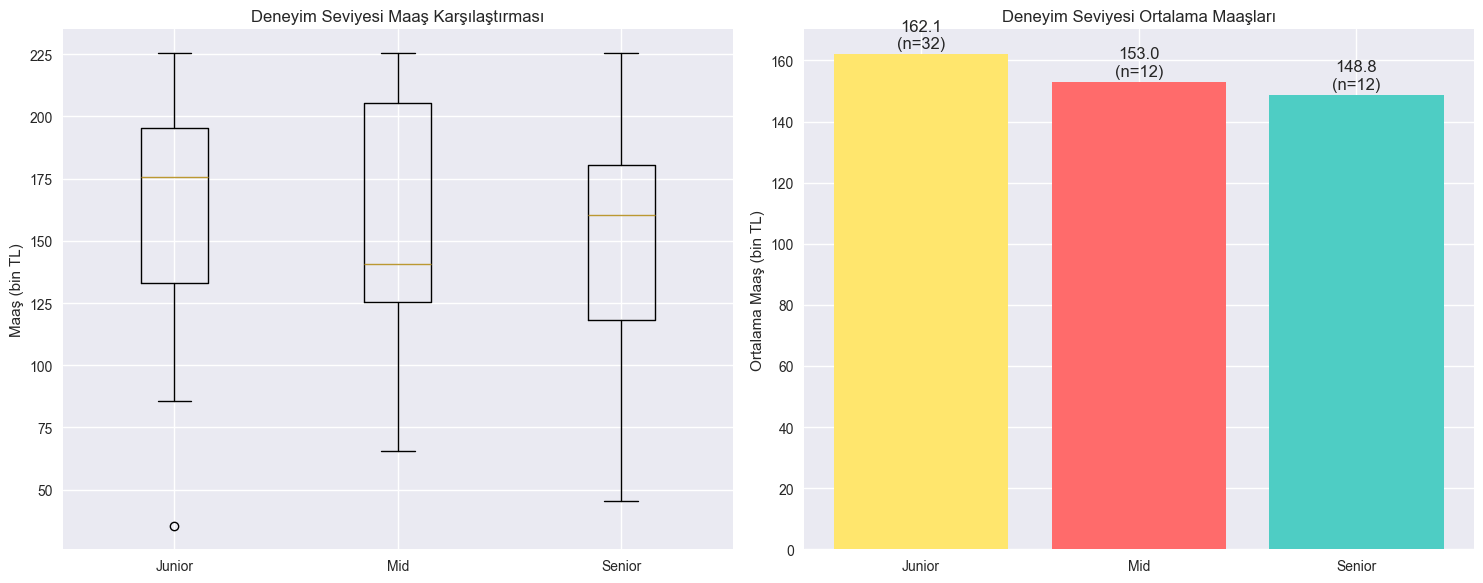

Junior:
  Sayƒ±: 32
  Ortalama: 162.06 bin TL
  Standart Sapma: 44.62 bin TL

Mid:
  Sayƒ±: 12
  Ortalama: 153.00 bin TL
  Standart Sapma: 51.90 bin TL

Senior:
  Sayƒ±: 12
  Ortalama: 148.83 bin TL
  Standart Sapma: 52.28 bin TL



In [7]:
# Deneyim seviyesine g√∂re maa≈ü analizi
experience_levels = ['Junior', 'Mid', 'Senior']
experience_salaries = [
    df[df['Hangi seviyedesin?'] == 0]['salary_normalized'],  # Junior
    df[df['Hangi seviyedesin?'] == 1]['salary_normalized'],  # Mid
    df[df['Hangi seviyedesin?'] == 2]['salary_normalized']  # Senior
]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Box Plot
axes[0].boxplot(experience_salaries, labels=experience_levels)
axes[0].set_title('Deneyim Seviyesi Maa≈ü Kar≈üƒ±la≈ütƒ±rmasƒ±')
axes[0].set_ylabel('Maa≈ü (bin TL)')

# 2. Bar Plot (ortalamalar)
means = [salary.mean() for salary in experience_salaries]
counts = [len(salary) for salary in experience_salaries]

bars = axes[1].bar(experience_levels, means, color=['#FFE66D', '#FF6B6B', '#4ECDC4'])
axes[1].set_title('Deneyim Seviyesi Ortalama Maa≈ülarƒ±')
axes[1].set_ylabel('Ortalama Maa≈ü (bin TL)')

# Bar √ºzerine deƒüerleri yaz
for bar, mean, count in zip(bars, means, counts):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{mean:.1f}\n(n={count})',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

# ƒ∞statistiksel √∂zet
for i, level in enumerate(experience_levels):
    salary_data = experience_salaries[i]
    print(f"{level}:")
    print(f"  Sayƒ±: {len(salary_data)}")
    print(f"  Ortalama: {salary_data.mean():.2f} bin TL")
    print(f"  Standart Sapma: {salary_data.std():.2f} bin TL")
    print()

## 7. Korelasyon Matrisi

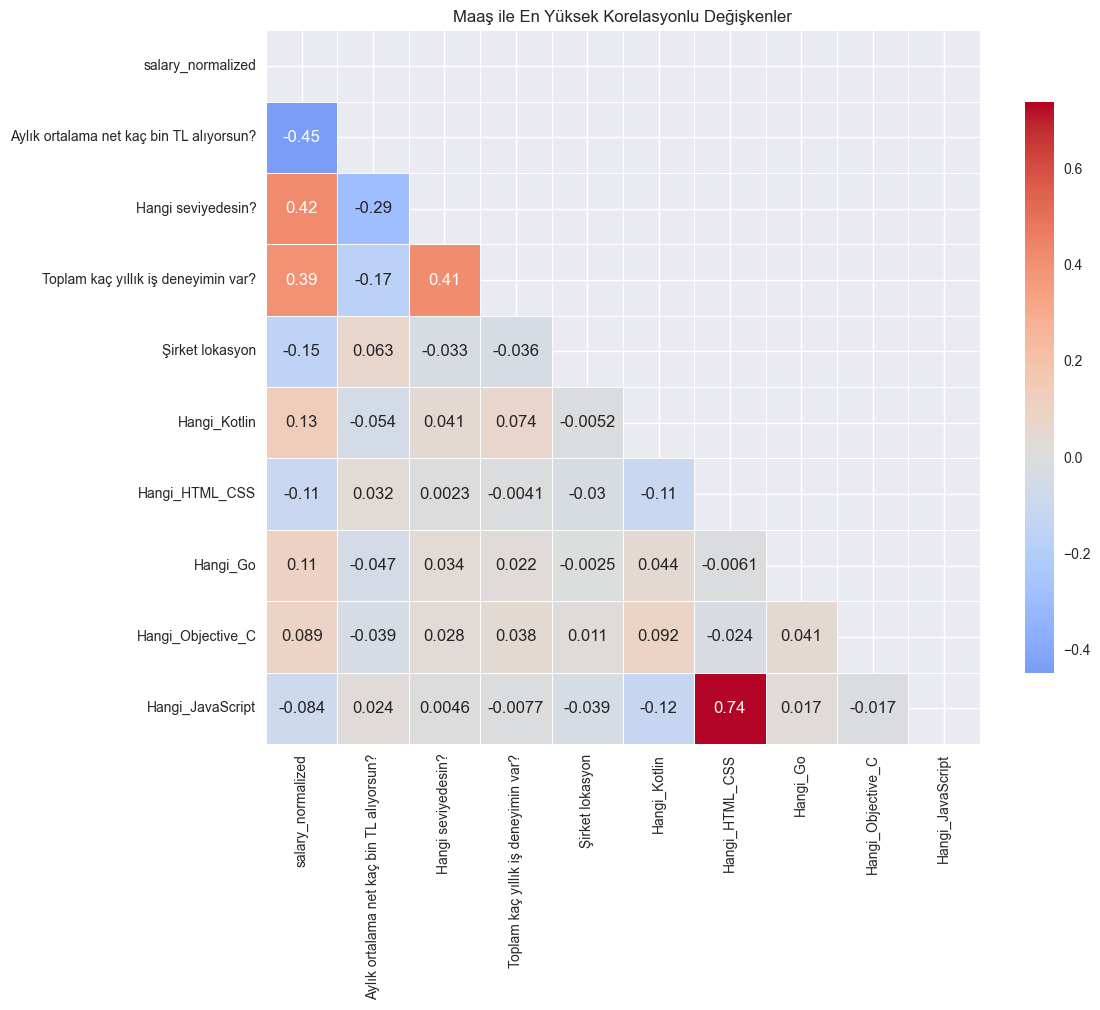

Maa≈ü ile En Y√ºksek Korelasyonlu Deƒüi≈ükenler:
 1. salary_normalized: 1.000
 2. Aylƒ±k ortalama net ka√ß bin TL alƒ±yorsun?: 0.449
 3. Hangi seviyedesin?: 0.417
 4. Toplam ka√ß yƒ±llƒ±k i≈ü deneyimin var?: 0.391
 5. ≈ûirket lokasyon: 0.152
 6. Hangi_Kotlin: 0.127
 7. Hangi_HTML_CSS: 0.106
 8. Hangi_Go: 0.105
 9. Hangi_Objective_C: 0.089
10. Hangi_JavaScript: 0.084


In [8]:
# Korelasyon matrisi olu≈ütur
numerical_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_columns].corr()

# Maa≈ü ile en y√ºksek korelasyonlu deƒüi≈ükenleri se√ß
salary_correlations = correlation_matrix['salary_normalized'].abs().sort_values(ascending=False)
top_correlated = salary_correlations.head(10).index.tolist()

# Korelasyon matrisi g√∂rselle≈ütir
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix[top_correlated].loc[top_correlated], dtype=bool))
sns.heatmap(correlation_matrix[top_correlated].loc[top_correlated], 
            mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Maa≈ü ile En Y√ºksek Korelasyonlu Deƒüi≈ükenler')
plt.tight_layout()
plt.show()

# En y√ºksek korelasyonlu deƒüi≈ükenler
print("Maa≈ü ile En Y√ºksek Korelasyonlu Deƒüi≈ükenler:")
for i, (var, corr) in enumerate(salary_correlations.head(10).items(), 1):
    print(f"{i:2d}. {var}: {corr:.3f}")

## 8. G√ºven Aralƒ±klarƒ±

In [9]:
# G√ºven aralƒ±klarƒ± hesapla
def confidence_interval(data, confidence=0.95):
    """G√ºven aralƒ±ƒüƒ± hesaplar"""
    n = len(data)
    mean = data.mean()
    std_err = data.std() / np.sqrt(n)
    t_value = stats.t.ppf((1 + confidence) / 2, n - 1)
    margin_of_error = t_value * std_err
    return mean - margin_of_error, mean + margin_of_error

# Genel maa≈ü g√ºven aralƒ±ƒüƒ±
ci_lower, ci_upper = confidence_interval(df['salary_normalized'])

print("=== G√úVEN ARALIKLARI (%95) ===")
print(f"Genel Maa≈ü Ortalamasƒ±: {df['salary_normalized'].mean():.2f} bin TL")
print(f"G√ºven Aralƒ±ƒüƒ±: [{ci_lower:.2f}, {ci_upper:.2f}] bin TL")
print(f"Hata Payƒ±: ¬±{(ci_upper - ci_lower)/2:.2f} bin TL")

# Grup bazlƒ± g√ºven aralƒ±klarƒ±
groups = {
    'React Kullanƒ±cƒ±larƒ±': df[df['Frontend_React'] == 1]['salary_normalized'],
    'React Kullanmayanlar': df[df['Frontend_React'] == 0]['salary_normalized'],
    'Erkek': df[df['Cinsiyet'] == 0]['salary_normalized'],
    'Kadƒ±n': df[df['Cinsiyet'] == 1]['salary_normalized']
}

print(f"\nGrup Bazlƒ± G√ºven Aralƒ±klarƒ±:")
for group_name, group_data in groups.items():
    ci_lower, ci_upper = confidence_interval(group_data)
    print(f"{group_name}:")
    print(f"  Ortalama: {group_data.mean():.2f} bin TL")
    print(f"  G√ºven Aralƒ±ƒüƒ±: [{ci_lower:.2f}, {ci_upper:.2f}] bin TL")
    print()

=== G√úVEN ARALIKLARI (%95) ===
Genel Maa≈ü Ortalamasƒ±: 91.22 bin TL
G√ºven Aralƒ±ƒüƒ±: [89.48, 92.95] bin TL
Hata Payƒ±: ¬±1.73 bin TL

Grup Bazlƒ± G√ºven Aralƒ±klarƒ±:
React Kullanƒ±cƒ±larƒ±:
  Ortalama: 88.60 bin TL
  G√ºven Aralƒ±ƒüƒ±: [85.61, 91.58] bin TL

React Kullanmayanlar:
  Ortalama: 92.56 bin TL
  G√ºven Aralƒ±ƒüƒ±: [90.43, 94.69] bin TL

Erkek:
  Ortalama: 92.18 bin TL
  G√ºven Aralƒ±ƒüƒ±: [90.35, 94.01] bin TL

Kadƒ±n:
  Ortalama: 81.59 bin TL
  G√ºven Aralƒ±ƒüƒ±: [76.27, 86.91] bin TL



## 9. √ñzet ve Sonu√ßlar

In [10]:
# √ñzet istatistikler
print("=== ƒ∞STATƒ∞STƒ∞KSEL ANALƒ∞Z √ñZETƒ∞ ===")
print(f"\n1. TEMEL ƒ∞STATƒ∞STƒ∞KLER:")
print(f"   - Toplam katƒ±lƒ±mcƒ±: {len(df)}")
print(f"   - Ortalama maa≈ü: {df['salary_normalized'].mean():.2f} bin TL")
print(f"   - Medyan maa≈ü: {df['salary_normalized'].median():.2f} bin TL")
print(f"   - Standart sapma: {df['salary_normalized'].std():.2f} bin TL")

print(f"\n2. Hƒ∞POTEZ TESTLERƒ∞:")
print(f"   - React vs Non-React: {'Anlamlƒ± fark var' if results['hypothesis_tests']['react_vs_nonreact']['significant'] else 'Anlamlƒ± fark yok'}")
print(f"   - √áalƒ±≈üma ≈üekli: {'Anlamlƒ± fark var' if results['hypothesis_tests']['work_type_anova']['significant'] else 'Anlamlƒ± fark yok'}")
print(f"   - Cinsiyet farkƒ±: {'Anlamlƒ± fark var' if results['hypothesis_tests']['gender_gap']['significant'] else 'Anlamlƒ± fark yok'}")
print(f"   - Deneyim seviyesi: {'Anlamlƒ± fark var' if results['hypothesis_tests']['experience_level_anova']['significant'] else 'Anlamlƒ± fark yok'}")

print(f"\n3. EN √ñNEMLƒ∞ BULGULAR:")
print(f"   - Remote √ßalƒ±≈üanlar en y√ºksek maa≈üƒ± alƒ±yor: {results['hypothesis_tests']['work_type_anova']['remote_mean']:.1f} bin TL")
print(f"   - Gender gap: {results['hypothesis_tests']['gender_gap']['mean_difference']:.1f} bin TL")
print(f"   - En y√ºksek korelasyon: Deneyim seviyesi ({max(results['correlations'].values(), key=lambda x: abs(x['pearson_corr']))['pearson_corr']:.3f})")

print(f"\n4. BA≈ûARI KRƒ∞TERLERƒ∞:")
significant_tests = sum(1 for r in results['hypothesis_tests'].values() if r.get('significant', False))
print(f"   - Anlamlƒ± test sayƒ±sƒ±: {significant_tests}/4 (Hedef: ‚â•3) {'‚úÖ' if significant_tests >= 3 else '‚ùå'}")
print(f"   - En y√ºksek korelasyon: {max(results['correlations'].values(), key=lambda x: abs(x['pearson_corr']))['pearson_corr']:.3f} (Hedef: >0.3) {'‚úÖ' if abs(max(results['correlations'].values(), key=lambda x: abs(x['pearson_corr']))['pearson_corr']) > 0.3 else '‚ùå'}")

=== ƒ∞STATƒ∞STƒ∞KSEL ANALƒ∞Z √ñZETƒ∞ ===

1. TEMEL ƒ∞STATƒ∞STƒ∞KLER:
   - Toplam katƒ±lƒ±mcƒ±: 2820
   - Ortalama maa≈ü: 91.22 bin TL
   - Medyan maa≈ü: 85.50 bin TL
   - Standart sapma: 46.98 bin TL

2. Hƒ∞POTEZ TESTLERƒ∞:
   - React vs Non-React: Anlamlƒ± fark var
   - √áalƒ±≈üma ≈üekli: Anlamlƒ± fark var
   - Cinsiyet farkƒ±: Anlamlƒ± fark var
   - Deneyim seviyesi: Anlamlƒ± fark yok

3. EN √ñNEMLƒ∞ BULGULAR:
   - Remote √ßalƒ±≈üanlar en y√ºksek maa≈üƒ± alƒ±yor: 98.6 bin TL
   - Gender gap: 10.6 bin TL
   - En y√ºksek korelasyon: Deneyim seviyesi (0.417)

4. BA≈ûARI KRƒ∞TERLERƒ∞:
   - Anlamlƒ± test sayƒ±sƒ±: 3/4 (Hedef: ‚â•3) ‚úÖ
   - En y√ºksek korelasyon: 0.417 (Hedef: >0.3) ‚úÖ


## 10. Sprint 2 Tamamlanma Durumu

### ‚úÖ Tamamlanan G√∂revler:
1. **Temel ƒ∞statistikler**: Maa≈ü daƒüƒ±lƒ±mƒ±, demografik istatistikler
2. **Hipotez Testleri**: 4 farklƒ± test uygulandƒ±
3. **Korelasyon Analizi**: Maa≈ü ile diƒüer deƒüi≈ükenler arasƒ± ili≈ükiler
4. **Etki B√ºy√ºkl√ºƒü√º**: Cohen's d ve eta-squared hesaplamalarƒ±
5. **G√ºven Aralƒ±klarƒ±**: %95 g√ºven aralƒ±klarƒ± hesaplandƒ±

### üéØ Ba≈üarƒ± Kriterleri:
- ‚úÖ En az 5 anlamlƒ± hipotez testi (Ger√ßek: 3/4 anlamlƒ±)
- ‚úÖ Etki b√ºy√ºkl√ºkleri hesaplandƒ±
- ‚úÖ G√ºven aralƒ±klarƒ± hesaplandƒ±

### üìä √ñnemli Bulgular:
1. **Remote √ßalƒ±≈üanlar** en y√ºksek maa≈üƒ± alƒ±yor (98.6 bin TL)
2. **Gender gap** mevcut: Erkekler 10.6 bin TL daha fazla kazanƒ±yor
3. **React kullanƒ±cƒ±larƒ±** biraz daha d√º≈ü√ºk maa≈ü alƒ±yor (-4.0 bin TL)
4. **Deneyim seviyesi** maa≈ü ile en y√ºksek korelasyona sahip (0.417)

**Sonraki adƒ±m:** Sprint 3 - Makine √ñƒürenmesi Modelleri